In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms,models
from torchvision.utils import make_grid
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_transform=transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(), #default 0.5
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

In [3]:
test_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

In [4]:
root='/home/amirtesh/Downloads/Computers/Python/MachineLearning/Udemy Pytorch/Convolutional neural networks/melanoma_cancer_dataset'

In [5]:
train_data=datasets.ImageFolder(os.path.join(root,'train'),transform=train_transform)
test_data=datasets.ImageFolder(os.path.join(root,'test'),transform=test_transform)

torch.manual_seed(42)
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10)

class_names=train_data.classes

In [6]:
class_names

['benign', 'malignant']

In [7]:
len(train_data)

9605

In [8]:
len(test_data)

1000

In [9]:
for images,labels in train_loader:
    break

In [10]:
images.shape

torch.Size([10, 3, 224, 224])

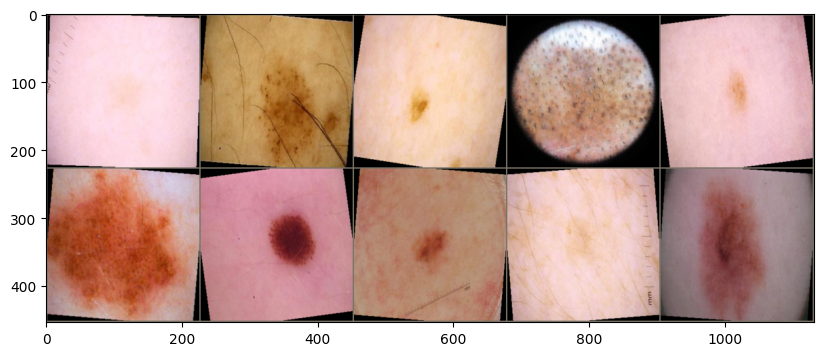

In [11]:
im=make_grid(images,nrow=5)

inv_normalize=transforms.Normalize(
    mean=[-0.485/0.229,-0.456/0.224,-0.406/0.225],
    std=[1/0.229,1/0.224,1/0.225]
)
im_inv=inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(),(1,2,0)))

In [16]:
train_transform=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])

test_transform=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [17]:
train_data=datasets.ImageFolder(root=os.path.join(root,'train'),transform=train_transform)
test_data=datasets.ImageFolder(root=os.path.join(root,'test'),transform=test_transform)

In [18]:
class_names=train_data.classes
class_dict=train_data.class_to_idx

class_names,class_dict

(['benign', 'malignant'], {'benign': 0, 'malignant': 1})

In [19]:
img,label=train_data[2][0],train_data[1][1]

print(f'Image tensor:\n {img} ')
print(f'Image shape: {img.shape}')
print(f'Image datatype: {img.dtype}')
print(f'Image label: {label}')
print(f'Label datatype: {type(label)}')

Image tensor:
 tensor([[[0.0000, 0.0000, 0.7137,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.7216,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.7294,  ..., 0.7686, 0.7725, 0.7686],
         ...,
         [0.6471, 0.6588, 0.6627,  ..., 0.6941, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.6980, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.6863, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.5333,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.5412,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.5490,  ..., 0.5765, 0.5804, 0.5765],
         ...,
         [0.5098, 0.5176, 0.5216,  ..., 0.5216, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.5255, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.5176, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.5451,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.5529,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.5608,  ..., 0.5

Original shape: torch.Size([3, 224, 224])
Image permute: torch.Size([224, 224, 3])


Text(0.5, 1.0, 'benign')

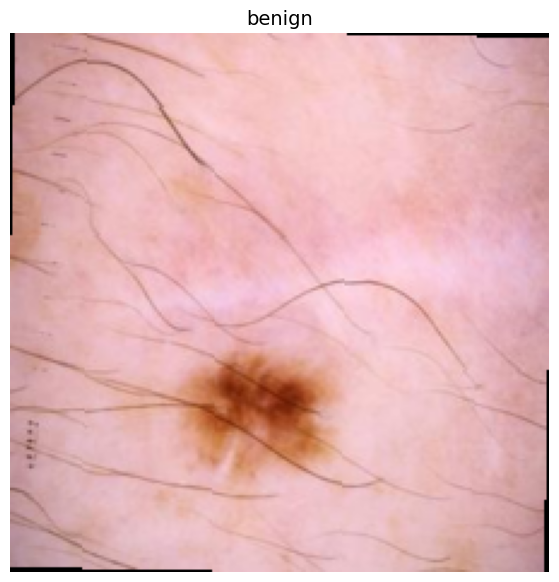

In [20]:
img_permute=img.permute(1,2,0) #changes index order
print(f'Original shape: {img.shape}') #[colour channels,height,width]
print(f'Image permute: {img_permute.shape}') #[height,width,colour channels]

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label],fontsize=14)

In [21]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    model.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [22]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    model.eval() 
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [23]:
from tqdm import tqdm
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          epochs:int):
    
    results={'train_loss':[],
             'train_acc':[],
             'test_loss':[],
             'test_acc':[]}
    
    for i in tqdm(range(epochs)):
        train_loss,train_acc=train_step(model=model,
                                        dataloader=train_dataloader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer)
        test_loss,test_acc=test_step(model=model,
                                     dataloader=test_dataloader,
                                     loss_fn=loss_fn)
        print(f'Epoch {i} | Train loss: {train_loss:.4f},Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f},Test acc: {test_acc:.4f}')
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

    return results

In [24]:
class Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv=nn.Sequential(
            nn.Conv2d(3,6,3,1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(6,16,3,1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Flatten(),
            nn.Linear(54*54*16,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,len(class_names))
        )

    def forward(self,X):
        return F.log_softmax(self.conv(X))

In [25]:
torch.manual_seed(101)
train_loader=DataLoader(dataset=train_data,batch_size=32,shuffle=True,num_workers=os.cpu_count())
test_loader=DataLoader(dataset=test_data,batch_size=32,shuffle=False,num_workers=os.cpu_count())

In [26]:
torch.manual_seed(101)
model1=Model()
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model1.parameters(),lr=0.001)


In [27]:
torch.manual_seed(42)

n=3
model1_results=train(
    model=model1,
    train_dataloader=train_loader,
    test_dataloader=test_loader,
    optimizer=optimizer,
    loss_fn=criterion,
    epochs=n
)

 33%|███▎      | 1/3 [01:04<02:08, 64.17s/it]

Epoch 0 | Train loss: 0.3690,Train acc: 0.8297 | Test loss: 0.2743,Test acc: 0.8887


 67%|██████▋   | 2/3 [02:10<01:05, 65.32s/it]

Epoch 1 | Train loss: 0.2863,Train acc: 0.8829 | Test loss: 0.2725,Test acc: 0.8818


100%|██████████| 3/3 [03:12<00:00, 64.31s/it]

Epoch 2 | Train loss: 0.2635,Train acc: 0.8901 | Test loss: 0.2545,Test acc: 0.8877


In [28]:
len(test_data)

1000

In [29]:
index=list(range(len(test_data)))
c=0

for i in index:
    model1.eval()
    with torch.no_grad():
        pred=model1(test_data[i][0].view(1,3,224,224)).argmax()
    
    if class_names[pred.item()]==class_names[test_data[i][1]]:
        c+=1

acc=c*100/1000
print(f'Accuracy: {acc}')

Accuracy: 89.7
